In [1]:
import sys
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib notebook

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/MinCiencia/Datos-COVID19/master/output/producto74/paso_a_paso.csv')
df2 = pd.read_csv('https://github.com/MinCiencia/Datos-COVID19/blob/master/output/producto1/Covid-19.csv?raw=true')

In [3]:
df2 = df2.loc[:, ['Codigo comuna','Poblacion']]
df2 = df2.rename(columns={'Codigo comuna':'codigo_comuna'})

In [4]:
df = df.drop(['region_residencia', 'zona','comuna_residencia'],axis=1)
df = df.melt(id_vars = ['codigo_comuna','codigo_region'])
df = df.rename(columns={'variable':'Fecha'})

In [5]:
df

,codigo_comuna,codigo_region,Fecha,value
0,15101,15,2020-07-28,3
1,15101,15,2020-07-28,1
2,15102,15,2020-07-28,3
3,15202,15,2020-07-28,3
4,15201,15,2020-07-28,3
...,...,...,...,...
193607,12101,12,2021-12-08,4
193608,12103,12,2021-12-08,4
193609,12104,12,2021-12-08,4
193610,12303,12,2021-12-08,4


In [6]:
df = df.merge(df2, on='codigo_comuna')
df.value = df.value.replace({3: 0, 2: 0, 4: 0}) # Valores 2,3,4 corresponden a comunas que no estan en cuarentena
df = df.dropna()
df['Poblacion_Cuarentena'] = df['value'] * df['Poblacion'] # 1 = Cuarentena , 0 = No cuarentena; Multiplicamos para obtener total de personas en cuaretena para todos los dias hasta el hoy.

df = df.groupby(['Fecha','codigo_region']).sum().reset_index()
df = df.drop(['codigo_comuna','value','Poblacion'],axis=1)
df['Fecha'] = pd.to_datetime(df['Fecha'])


In [7]:
df

,Fecha,codigo_region,Poblacion_Cuarentena
0,2020-07-28,1,370857.0
1,2020-07-28,2,658916.0
2,2020-07-28,3,171766.0
3,2020-07-28,4,0.0
4,2020-07-28,5,921680.0
...,...,...,...
7979,2021-12-08,12,0.0
7980,2021-12-08,13,0.0
7981,2021-12-08,14,0.0
7982,2021-12-08,15,0.0


In [29]:
region1 = df[(df['codigo_region'] == 1)]
region2 = df[(df['codigo_region'] == 2)]
region3 = df[(df['codigo_region'] == 3)]
region4 = df[(df['codigo_region'] == 4)]
region5 = df[(df['codigo_region'] == 5)]
region6 = df[(df['codigo_region'] == 6)]
region7 = df[(df['codigo_region'] == 7)]
region8 = df[(df['codigo_region'] == 8)]
region9 = df[(df['codigo_region'] == 9)]
region10 = df[(df['codigo_region'] == 10)]
region11 = df[(df['codigo_region'] == 11)]
region12 = df[(df['codigo_region'] == 12)]
region13 = df[(df['codigo_region'] == 13)]
region14 = df[(df['codigo_region'] == 14)]
region15 = df[(df['codigo_region'] == 15)]
region16 = df[(df['codigo_region'] == 16)]
total = df.groupby(['Fecha']).sum().reset_index()

In [9]:
region1

,Fecha,codigo_region,Poblacion_Cuarentena
0,2020-07-28,1,370857.0
16,2020-07-29,1,370857.0
32,2020-07-30,1,370857.0
48,2020-07-31,1,370857.0
64,2020-08-01,1,370857.0
...,...,...,...
7904,2021-12-04,1,0.0
7920,2021-12-05,1,0.0
7936,2021-12-06,1,0.0
7952,2021-12-07,1,0.0


<IPython.core.display.Javascript object>


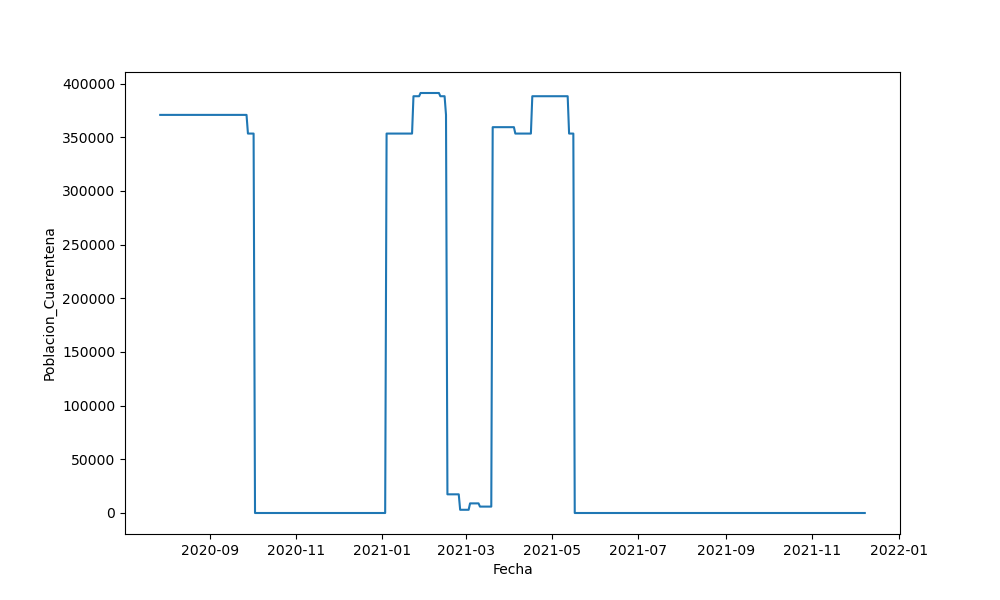

Dia con mayor personas en cuarentena Fecha                   2021-01-28 00:00:00
codigo_region                             1
Poblacion_Cuarentena               391252.0
Name: 2944, dtype: object


In [12]:
plt.figure(figsize = (10,6))
sns.lineplot(x = 'Fecha' , y = 'Poblacion_Cuarentena',data = region1)

print('Dia con mayor personas en cuarentena' , region1.loc[region1['Poblacion_Cuarentena'].idxmax()])


<IPython.core.display.Javascript object>


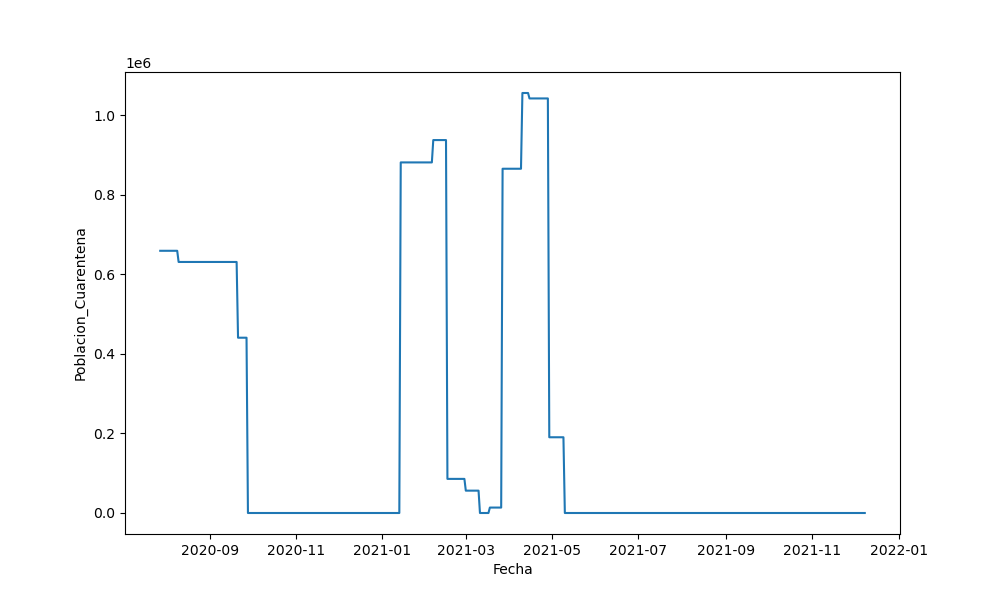

Dia con mayor personas en cuarentena Fecha                   2021-04-10 00:00:00
codigo_region                             2
Poblacion_Cuarentena              1055443.0
Name: 4097, dtype: object


In [13]:
plt.figure(figsize = (10,6))
sns.lineplot(x = 'Fecha' , y = 'Poblacion_Cuarentena',data = region2)

print('Dia con mayor personas en cuarentena' , region2.loc[region2['Poblacion_Cuarentena'].idxmax()])


<IPython.core.display.Javascript object>


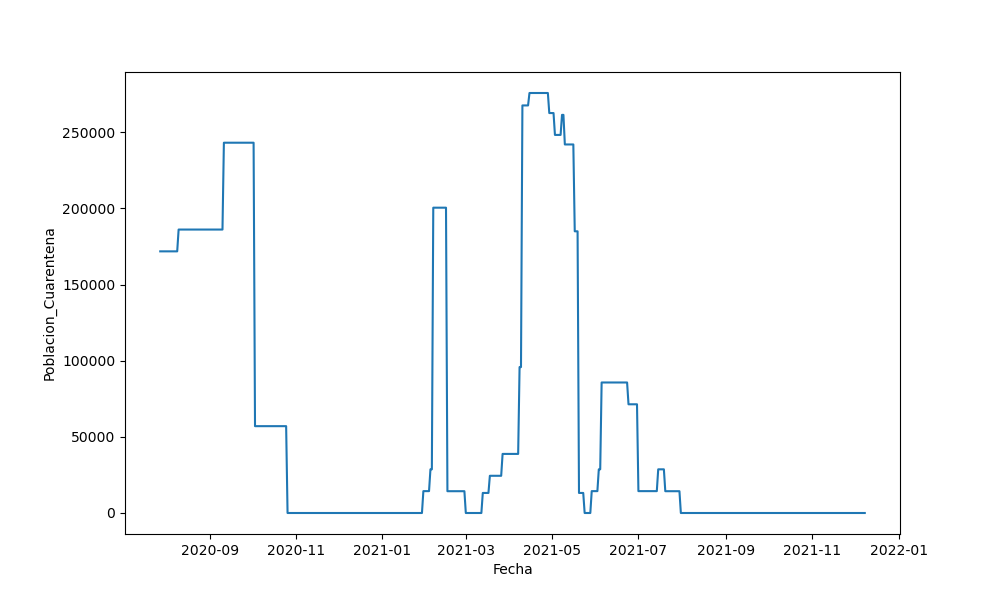

Dia con mayor personas en cuarentena Fecha                   2021-04-15 00:00:00
codigo_region                             3
Poblacion_Cuarentena               275723.0
Name: 4178, dtype: object


In [14]:
plt.figure(figsize = (10,6))
sns.lineplot(x = 'Fecha' , y = 'Poblacion_Cuarentena',data = region3)

print('Dia con mayor personas en cuarentena' , region3.loc[region3['Poblacion_Cuarentena'].idxmax()])


<IPython.core.display.Javascript object>


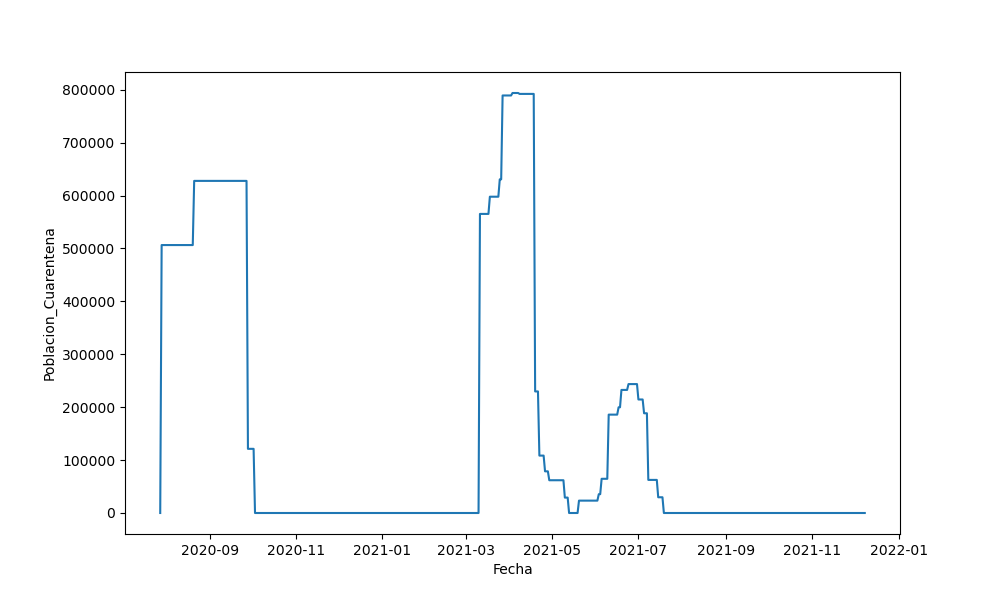

Dia con mayor personas en cuarentena Fecha                   2021-04-03 00:00:00
codigo_region                             4
Poblacion_Cuarentena               793772.0
Name: 3987, dtype: object


In [15]:
plt.figure(figsize = (10,6))
sns.lineplot(x = 'Fecha' , y = 'Poblacion_Cuarentena',data = region4)

print('Dia con mayor personas en cuarentena' , region4.loc[region4['Poblacion_Cuarentena'].idxmax()])


<IPython.core.display.Javascript object>


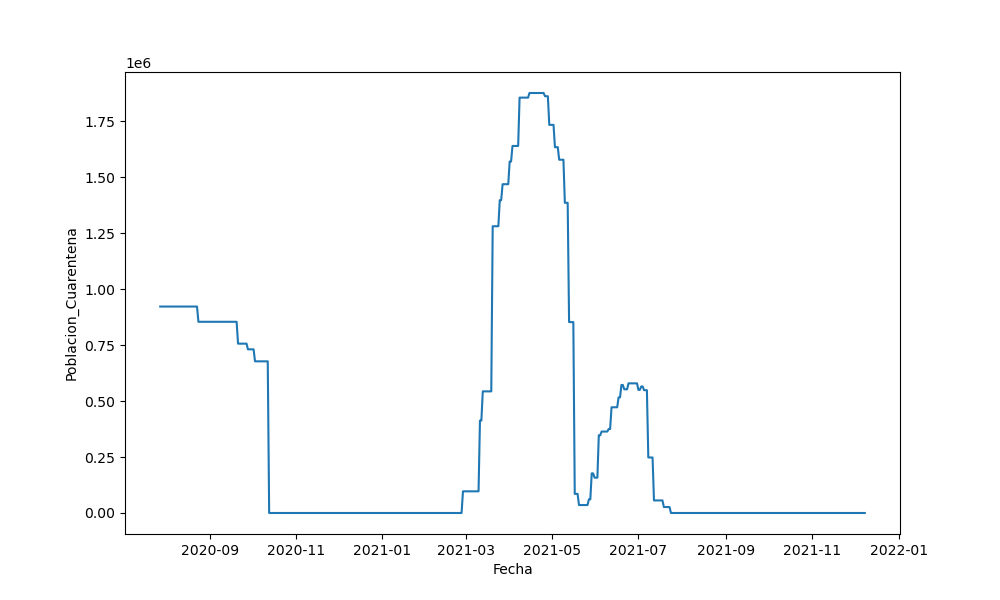

Dia con mayor personas en cuarentena Fecha                   2021-04-15 00:00:00
codigo_region                             5
Poblacion_Cuarentena              1875007.0
Name: 4180, dtype: object


In [17]:
plt.figure(figsize = (10,6))
sns.lineplot(x = 'Fecha' , y = 'Poblacion_Cuarentena',data = region5)

print('Dia con mayor personas en cuarentena' , region5.loc[region5['Poblacion_Cuarentena'].idxmax()])


<IPython.core.display.Javascript object>


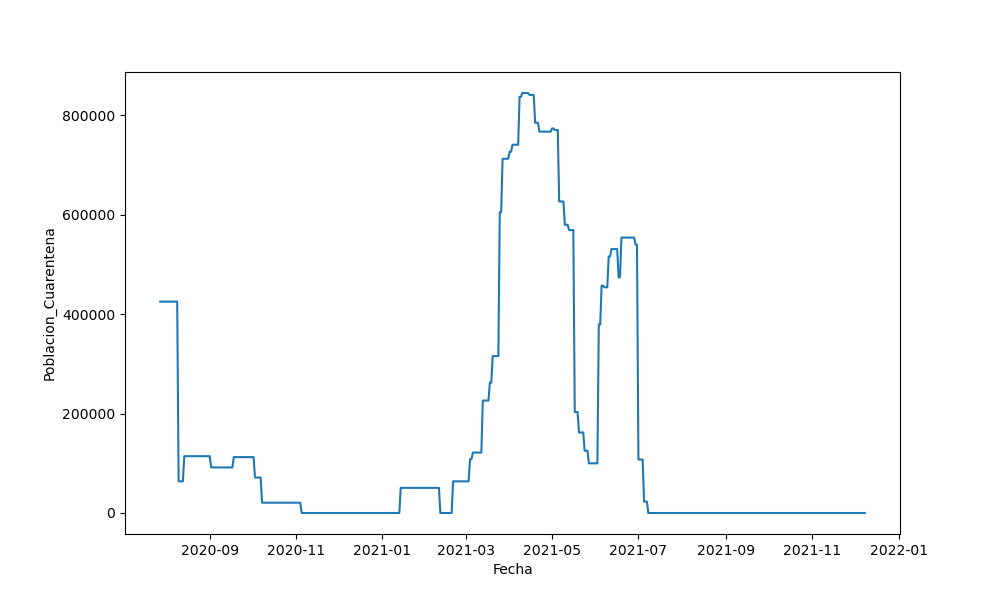

Dia con mayor personas en cuarentena Fecha                   2021-04-10 00:00:00
codigo_region                             6
Poblacion_Cuarentena               845196.0
Name: 4101, dtype: object


In [18]:
plt.figure(figsize = (10,6))
sns.lineplot(x = 'Fecha' , y = 'Poblacion_Cuarentena',data = region6)

print('Dia con mayor personas en cuarentena' , region6.loc[region6['Poblacion_Cuarentena'].idxmax()])


<IPython.core.display.Javascript object>


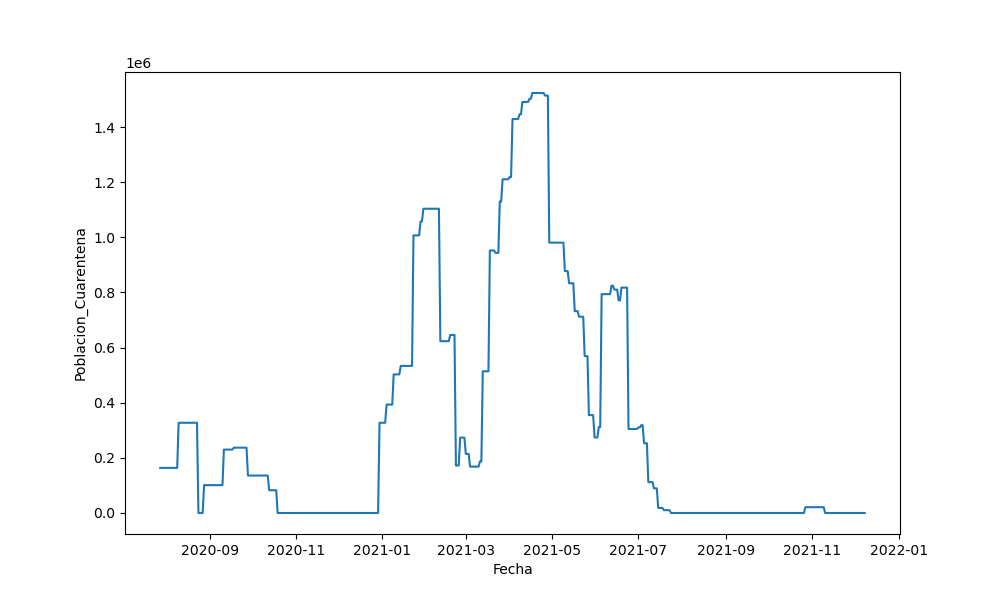

Dia con mayor personas en cuarentena Fecha                   2021-04-17 00:00:00
codigo_region                             7
Poblacion_Cuarentena              1523404.0
Name: 4214, dtype: object


In [19]:
plt.figure(figsize = (10,6))
sns.lineplot(x = 'Fecha' , y = 'Poblacion_Cuarentena',data = region7)

print('Dia con mayor personas en cuarentena' , region7.loc[region7['Poblacion_Cuarentena'].idxmax()])


<IPython.core.display.Javascript object>


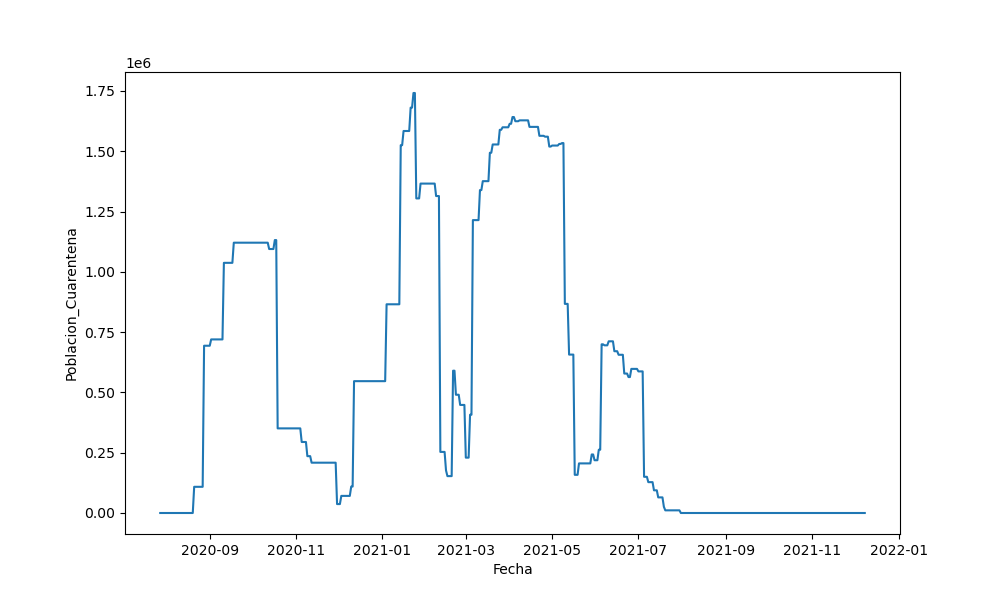

Dia con mayor personas en cuarentena Fecha                   2021-01-23 00:00:00
codigo_region                             8
Poblacion_Cuarentena              1741315.0
Name: 2871, dtype: object


In [20]:
plt.figure(figsize = (10,6))
sns.lineplot(x = 'Fecha' , y = 'Poblacion_Cuarentena',data = region8)

print('Dia con mayor personas en cuarentena' , region8.loc[region8['Poblacion_Cuarentena'].idxmax()])


<IPython.core.display.Javascript object>


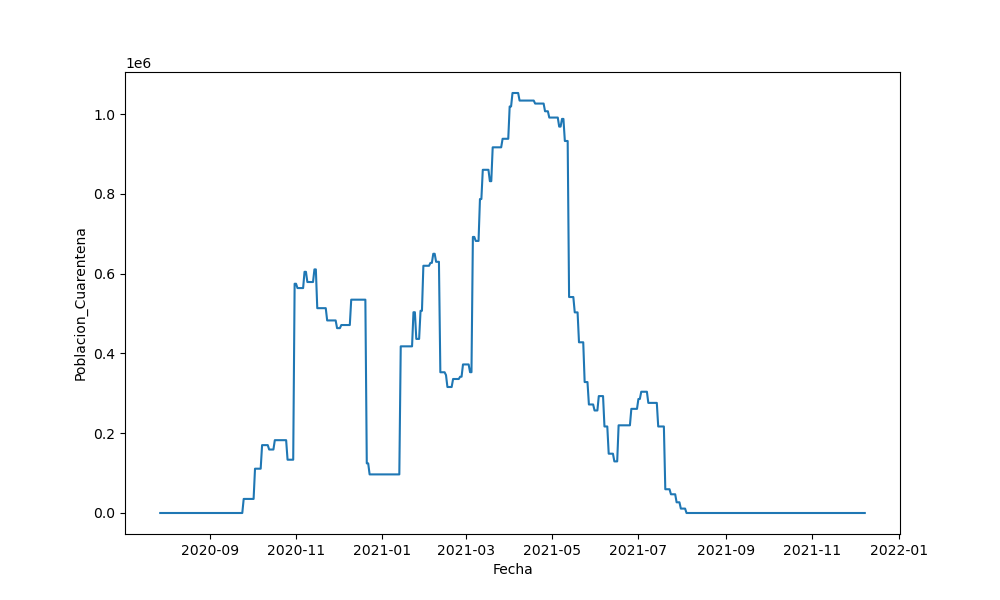

Dia con mayor personas en cuarentena Fecha                   2021-04-03 00:00:00
codigo_region                             9
Poblacion_Cuarentena              1053231.0
Name: 3992, dtype: object


In [21]:
plt.figure(figsize = (10,6))
sns.lineplot(x = 'Fecha' , y = 'Poblacion_Cuarentena',data = region9)

print('Dia con mayor personas en cuarentena' , region9.loc[region9['Poblacion_Cuarentena'].idxmax()])


<IPython.core.display.Javascript object>


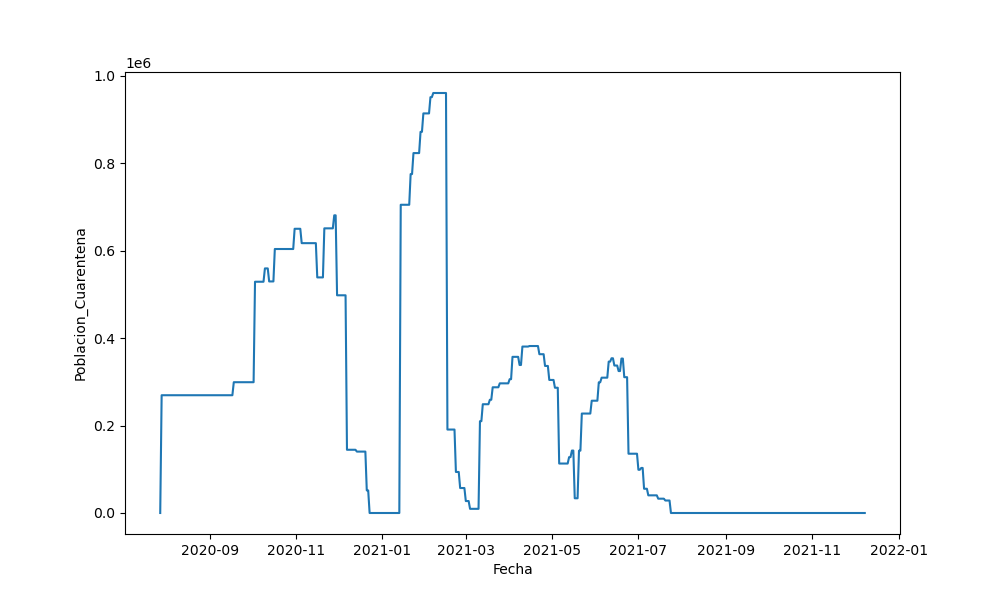

Dia con mayor personas en cuarentena Fecha                   2021-02-06 00:00:00
codigo_region                            10
Poblacion_Cuarentena               960744.0
Name: 3097, dtype: object


In [22]:
plt.figure(figsize = (10,6))
sns.lineplot(x = 'Fecha' , y = 'Poblacion_Cuarentena',data = region10)

print('Dia con mayor personas en cuarentena' , region10.loc[region10['Poblacion_Cuarentena'].idxmax()])


<IPython.core.display.Javascript object>


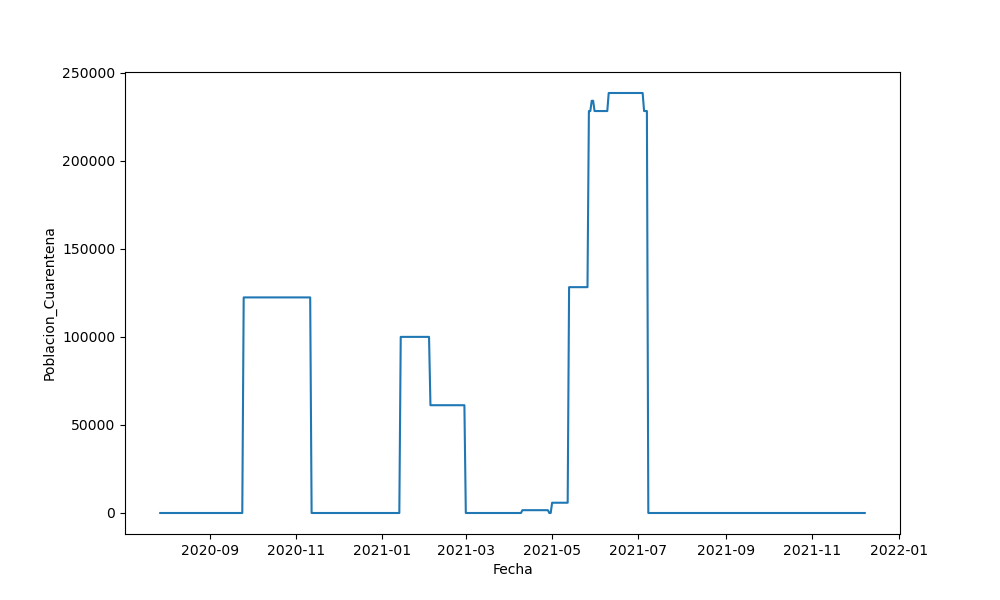

Dia con mayor personas en cuarentena Fecha                   2021-06-10 00:00:00
codigo_region                            11
Poblacion_Cuarentena               238498.0
Name: 5082, dtype: object


In [23]:
plt.figure(figsize = (10,6))
sns.lineplot(x = 'Fecha' , y = 'Poblacion_Cuarentena',data = region11)

print('Dia con mayor personas en cuarentena' , region11.loc[region11['Poblacion_Cuarentena'].idxmax()])


<IPython.core.display.Javascript object>


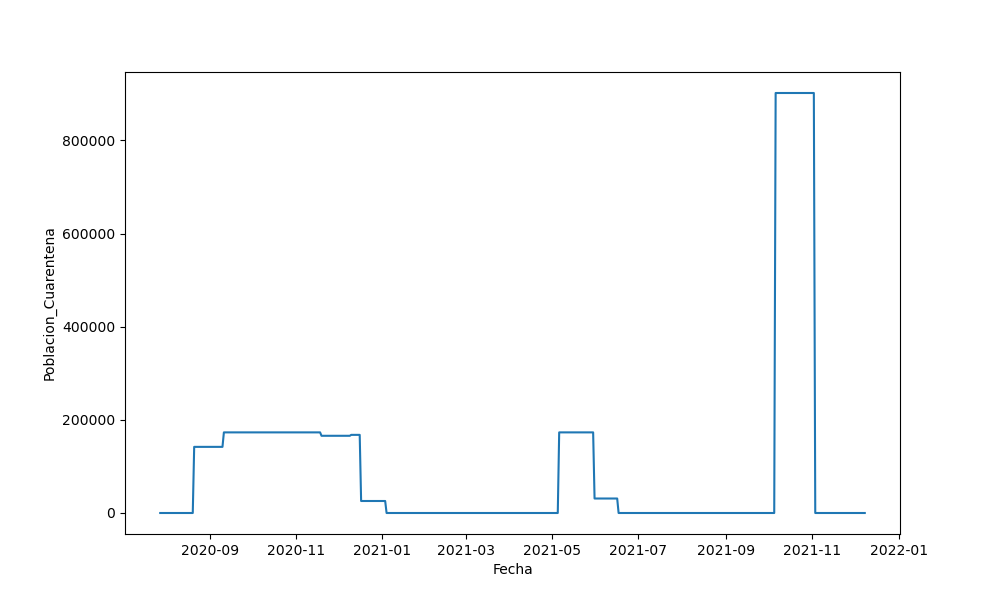

Dia con mayor personas en cuarentena Fecha                   2021-10-06 00:00:00
codigo_region                            12
Poblacion_Cuarentena               901725.0
Name: 6971, dtype: object


In [24]:
plt.figure(figsize = (10,6))
sns.lineplot(x = 'Fecha' , y = 'Poblacion_Cuarentena',data = region12)

print('Dia con mayor personas en cuarentena' , region12.loc[region12['Poblacion_Cuarentena'].idxmax()])


<IPython.core.display.Javascript object>


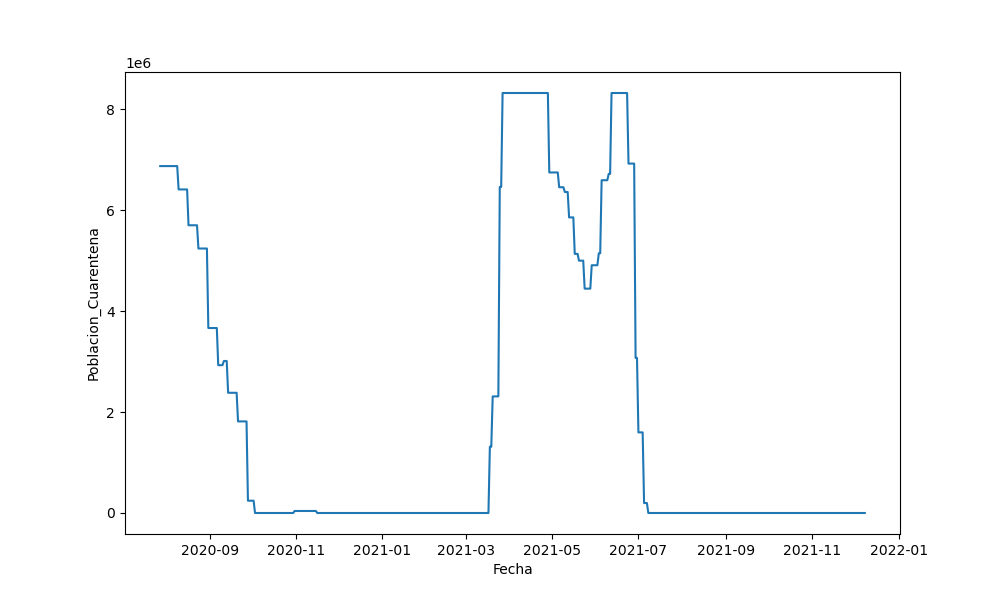

Dia con mayor personas en cuarentena Fecha                   2021-03-27 00:00:00
codigo_region                            13
Poblacion_Cuarentena              8321758.0
Name: 3884, dtype: object


In [25]:
plt.figure(figsize = (10,6))
sns.lineplot(x = 'Fecha' , y = 'Poblacion_Cuarentena',data = region13)

print('Dia con mayor personas en cuarentena' , region13.loc[region13['Poblacion_Cuarentena'].idxmax()])


<IPython.core.display.Javascript object>


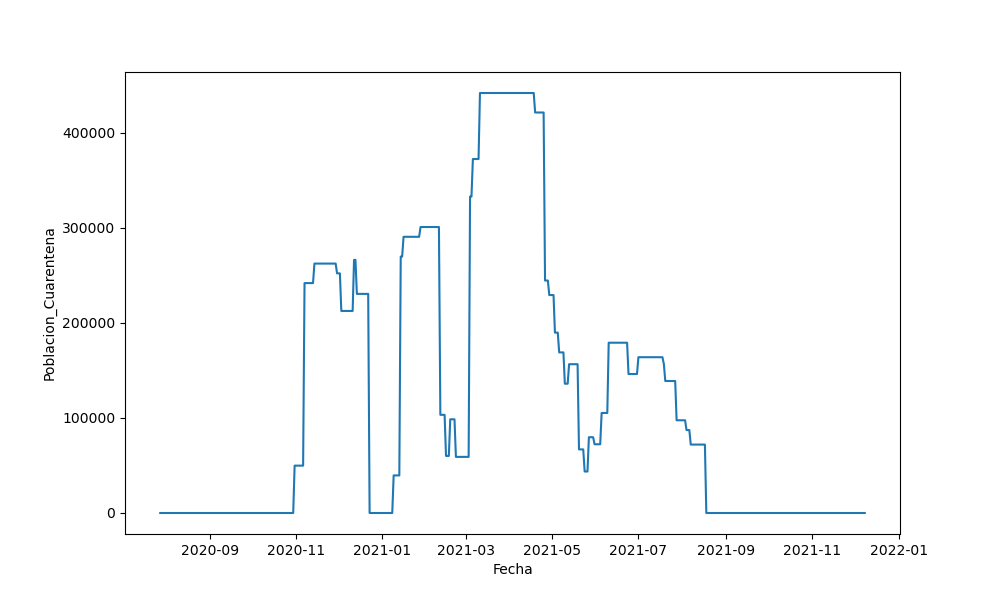

Dia con mayor personas en cuarentena Fecha                   2021-03-11 00:00:00
codigo_region                            14
Poblacion_Cuarentena               441826.0
Name: 3629, dtype: object


In [26]:
plt.figure(figsize = (10,6))
sns.lineplot(x = 'Fecha' , y = 'Poblacion_Cuarentena',data = region14)

print('Dia con mayor personas en cuarentena' , region14.loc[region14['Poblacion_Cuarentena'].idxmax()])


<IPython.core.display.Javascript object>


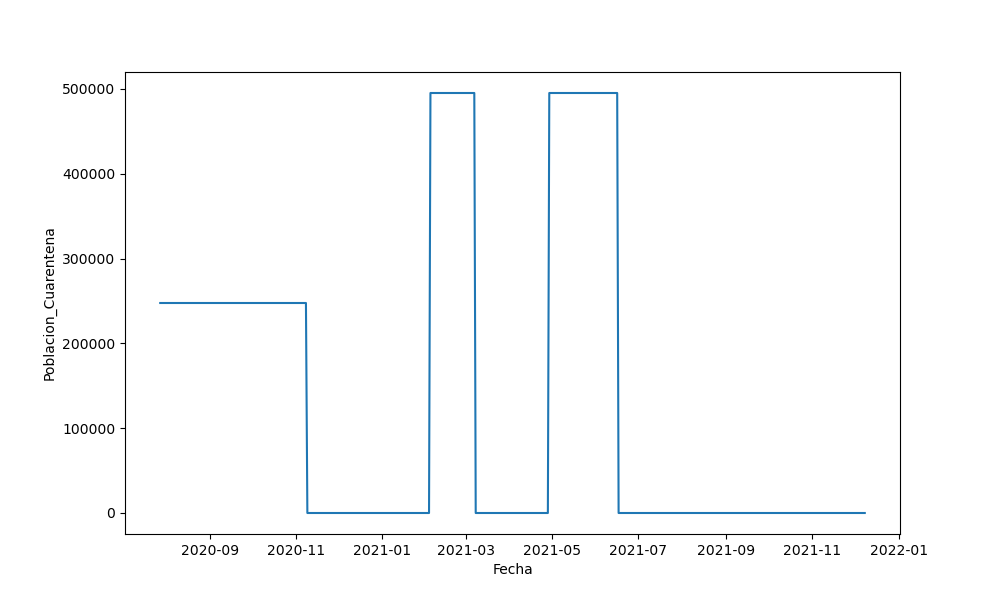

Dia con mayor personas en cuarentena Fecha                   2021-02-04 00:00:00
codigo_region                            15
Poblacion_Cuarentena               495104.0
Name: 3070, dtype: object


In [27]:
plt.figure(figsize = (10,6))
sns.lineplot(x = 'Fecha' , y = 'Poblacion_Cuarentena',data = region15)

print('Dia con mayor personas en cuarentena' , region15.loc[region15['Poblacion_Cuarentena'].idxmax()])


<IPython.core.display.Javascript object>


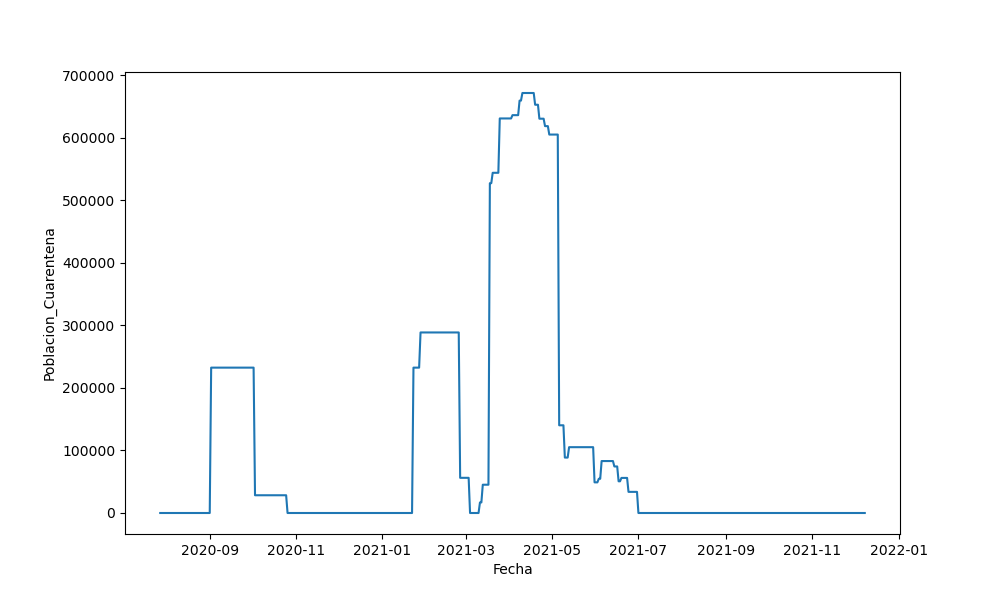

Dia con mayor personas en cuarentena Fecha                   2021-04-10 00:00:00
codigo_region                            16
Poblacion_Cuarentena               671615.0
Name: 4111, dtype: object


In [28]:
plt.figure(figsize = (10,6))
sns.lineplot(x = 'Fecha' , y = 'Poblacion_Cuarentena',data = region16)

print('Dia con mayor personas en cuarentena' , region16.loc[region16['Poblacion_Cuarentena'].idxmax()])


<IPython.core.display.Javascript object>


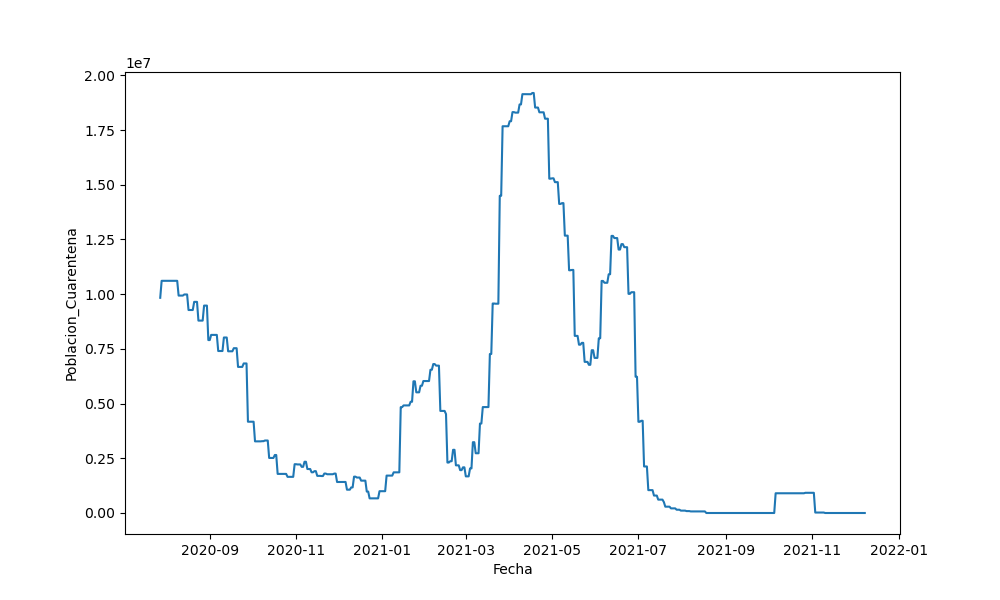

Dia con mayor personas en cuarentena Fecha                   2021-04-17 00:00:00
codigo_region                           136
Poblacion_Cuarentena             19191466.0
Name: 263, dtype: object


In [30]:
plt.figure(figsize = (10,6))
sns.lineplot(x = 'Fecha' , y = 'Poblacion_Cuarentena',data = total)

print('Dia con mayor personas en cuarentena' , total.loc[total['Poblacion_Cuarentena'].idxmax()])
